# Feedforward Neural Network

> 2.2.3 장에 해당하는 코드

In [1]:
import torch
from utils import draw_function

## 활성화 함수

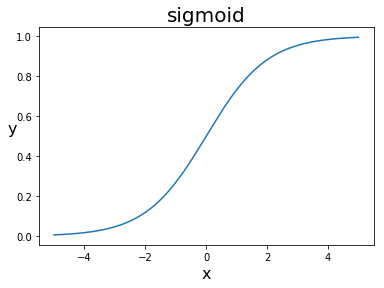

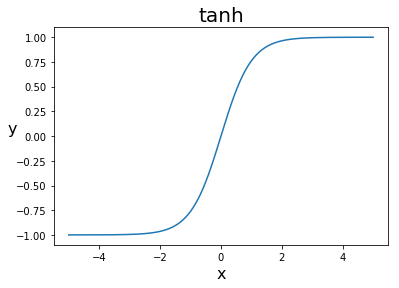

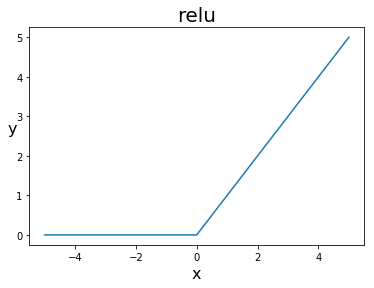

In [2]:
# 표 2-5

draw_function(torch.sigmoid)
draw_function(torch.tanh)
draw_function(torch.relu)

# Forward propagation: 2 Layer Network

In [3]:
# 코드 2-3, 2-4

torch.manual_seed(70)
# 입력 텐서 생성
x = torch.Tensor([[0, 1]])

# Input > Hidden
# 은닉층 가중치 초기화
# 0과 1 사이에서 무작위로 뽑아서 (2, 2) 크기의 텐서 생성
W1 = torch.rand((2, 2))  
# 0과 1 사이에서 무작위로 뽑아서 (1, 2) 크기의 벡터 셍성
b1 = torch.rand((1, 2))  
# 은닉층 층 forward
# (1, 2) x (2, 2) + (1, 2) = (1, 2)
z1 = torch.mm(x, W1.t()) + b1  
a1 = torch.sigmoid(z1)

def identity_func(x):
    """항등 함수"""
    return x
# Hidden > Output
# 출력층 가중치 초기화
W2 = torch.rand((1, 2))  
b2 = torch.rand((1, 1))
# 출력층 층 forward
z2 = torch.mm(a1, W2.t()) + b2  # (1, 2) x (2, 1) + (1, 1) = (1, 2)
y = identity_func(z2)

In [4]:
# 코드 2-5

torch.manual_seed(70)

import torch.nn as nn
# 선형결합, sigmoid 모듈 선언
linear_ih = nn.Linear(in_features=2, out_features=2)  # input layer > hidden layer 
linear_ho = nn.Linear(in_features=2, out_features=1)  # hidden layer > output layer
activation_layer = nn.Sigmoid()

# forward 과정
z1 = linear_ih(x)
a1 = activation_layer(z1)
z2 = linear_ho(a1)
y = identity_func(z2)
print(y.item())

-0.3213229477405548


In [5]:
# Code 2-6

torch.manual_seed(70)

class Network(nn.Module):
    """XOR Network"""
    def __init__(self, input_size, hidden_size, output_size):
        super(Network, self).__init__()
        # 층을 구성
        # input layer > hidden layer 
        self.linear_ih = nn.Linear(in_features=input_size, 
                                   out_features=hidden_size)
        # hidden layer > output layer
        self.linear_ho = nn.Linear(in_features=hidden_size, 
                                   out_features=output_size)
        # activation layer
        self.activation_layer = nn.Sigmoid()
    
    def identity_func(self, x):
        """항등 함수"""
        return x
    
    def forward(self, x):
        z1 = self.linear_ih(x)
        a1 = self.activation_layer(z1)
        z2 = self.linear_ho(a1)
        y = self.identity_func(z2)
        return y

# 커스텀 모듈 호출
net = Network(input_size=2, hidden_size=2, output_size=1)
y = net(x)
print(y.item())

-0.3213229477405548
